# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [29]:
# Import libraries and packages.

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [30]:
# Import data
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

**Answer:**
* To determine what are the variables and variable types represented in the data
* To determine whether there are any missing values, possible outliers, or incorrectly input data. 
* To familiarise oneself with the data, e.g. looking at the descriptive statistics for each variable.
* To determine whether the data is normally distributed, and identidfy which variable(s) appear(s) to be linearly correlated with the variable of interest.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

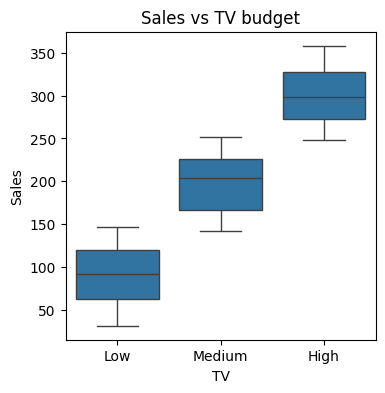

In [31]:
# Create a boxplot with TV and Sales.
plt.figure(figsize = (4,4))
sns.boxplot(data=data, x="TV", y="Sales")
plt.title("Sales vs TV budget")
plt.show()

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

**Answer:** `Sales` appears to show positive linear correlation with `TV` budget categories.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

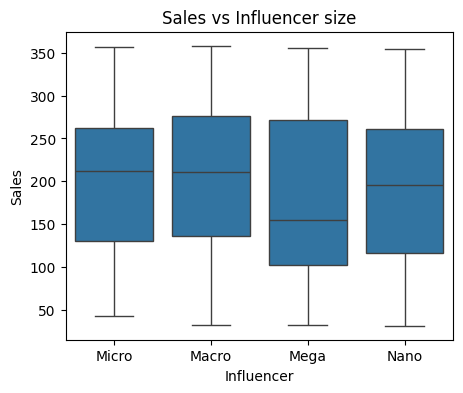

In [32]:
# Create a boxplot with Influencer and Sales.
plt.figure(figsize = (5,4))
sns.boxplot(data=data, x="Influencer", y="Sales")
plt.title("Sales vs Influencer size")
plt.show()


**Question:** Is there variation in `Sales` based off the `Influencer` size?

**Answer:** There isn't any variation of `Sales` based on `Influencer` size.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [33]:
# Count the total number of rows and rows containing missing data.
print(f'Total number of rows in dataset: {data.shape[0]}')
print(f'Number of rows with missing data: {data.isna().any(axis=1).sum()}')

# Drop rows that contain missing data and update the DataFrame.
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

# Confirm the data contains no missing values.
print(f'Missing values after dropping na: {data.isna().any(axis=1).sum()}')



Total number of rows in dataset: 572
Number of rows with missing data: 3
Missing values after dropping na: 0


## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [42]:
# Define the OLS formula.
ols_formula = "Sales ~ C(TV)"

# Create an OLS model.
OLS_model =ols(formula=ols_formula, data=data)

# Fit the model.
model = OLS_model.fit()

# Save the results summary.
model_summary = model.summary()

# Display the model results.
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          8.81e-256
Time:                        10:19:12   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which categorical variable did you choose for the model? Why?

**Answer:** `TV` was the categorical variable of choice as it appeared to linearly correlate with `Sales` in EDA. 

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

* The linearity assumption is met, as it is shown in the box plot above. 

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

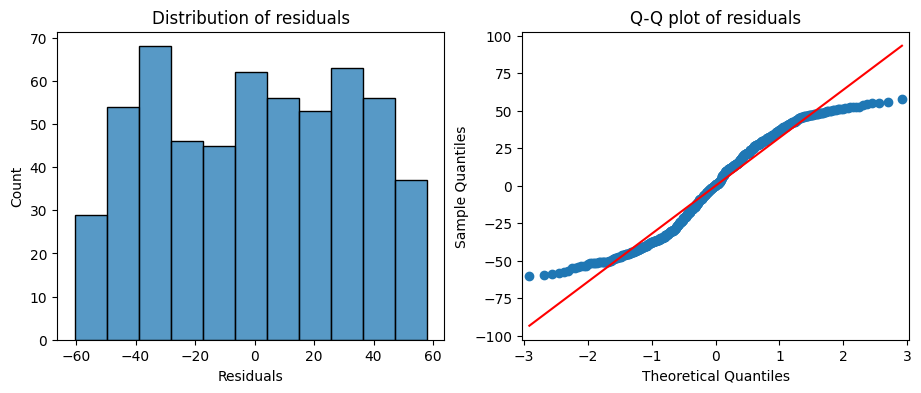

In [55]:
# Calculate the residuals.
residuals = model.resid

# Create a histogram with the residuals. 
fig, axes = plt.subplots(1, 2, figsize = (11,4))
sns.histplot(data=residuals, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_title('Distribution of residuals')

# Create a QQ plot of the residuals.
fig = sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Q-Q plot of residuals")
plt.show()

**Question:** Is the normality assumption met?

* There is reasonable concern that the normality assumption is not met when `TV` is used as the independent variable predicting `Sales`. The normal q-q forms an 'S' that deviates off theoretical quantiles of a normal distribution. 

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

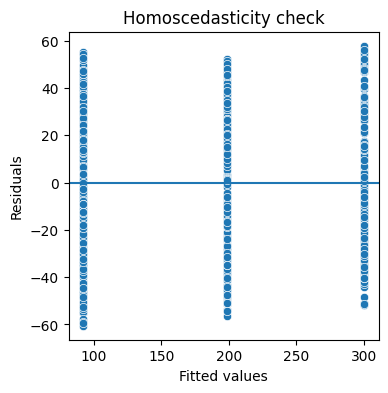

In [66]:
# Create a scatter plot with the fitted values from the model and the residuals.
plt.figure(figsize=(4,4))
sns.scatterplot(x=model.predict(data['TV']), y=residuals)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0)

# Add labels
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity check")
plt.show()

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

* Yes, this assumption is met. There is no variation in residuals based on fitted values. 

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [67]:
# Display the model results summary.
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          8.81e-256
Time:                        10:19:12   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** What is your interpretation of the model's R-squared?

* The linear regression model has $R^{2} = 0.874$. This means that the model explains $87.4\%$ of the variation in `Sales`, suggesting it is a good predictor of the variation in `Sales`.  

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The default category for the model is `High`. According to the model, `Sales` with a `Medium` or `Low` `TV` category are lower on average than `Sales` with a `High` `TV` category. For example, the model predicts that a `Low` `TV` promotion budget would be 208.813 millions of $ lower in `Sales` on average than a `High` `TV` promotion. The $95\%$ confidence intervals for each coefficient should be reported when presenting results to stakeholders. This means that there is a $95\%$ chance the confidence interval  contains the true parameter of the slope of $\beta$.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a $95\%$ chance the interval $[-215.353,-202.274]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

**Question:** Do you think your model could be improved? Why or why not? How?

* taking into account that `TV` was as an accurate predictor, the model could be improved with a more detailed stratification of the `TV` promotions, or by using numerical values for `TV` promotion budgets. Other variables, such as the location of the marketing campaign or the time of year, may increase model accuracy. 

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [68]:
# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


**Question:** What are the null and alternative hypotheses for the ANOVA test?

* Null hypothesis:  there is no difference in `Sales` based on the `TV` promotion budget.

* Alternative hypothesis: there is a difference in `Sales` based on the `TV` promotion budget.

**Question:** What is your conclusion from the one-way ANOVA test?

* The F-test statistic $ = 1971.46$ and the p-value  $ = 8.81 * 10^{-256}$. P-value  is lower than significance threshold, therefore the null hypothesis can be rejected.

**Question:** What did the ANOVA test tell you?

* There is a statistically significant difference in `Sales` among `TV` groups.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [71]:
# Perform the Tukey's HSD post hoc test.
one_way_tukey = pairwise_tukeyhsd(endog=data['Sales'], groups=data['TV'], alpha=0.05)

one_way_tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


**Question:** What is your interpretation of the Tukey HSD test?

* For all comparisons (`High` vs `Low`, `High` vs `Medium`, `Low` va `Medium`), $p-value < 0.05$, meaning that the null hypothesis can be rejected, i.e. that there is a signifcant difference between the groups. 

**Question:** What did the post hoc tell you?**

* A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

* The results were that `Sales` is not the same between any pair of `TV` groups. 

## **Considerations**

**What are some key takeaways that you learned during this lab?**
* Box-plots are a helpful tool for visualizing the distribution of a variable across groups.
* One-way ANOVA can be used to determine if there are significant differences among the means of three or more groups.
* ANOVA post hoc tests provide a more detailed view of the pairwise differences between groups.


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

**Answer:**

The key finding of this project is that high TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.


Below are estimates for the difference between the mean sales resulting from different pairs of TV promtion budgets, as determined by the Tukey's HSD test:

* Estimated difference between the mean sales from High vs Low TV promotions: $208.81  million (95% CI: [$200.99, $216.64] million). 
* Estimated difference between the mean sales from High and Medium TV promotions: $101.51 million (95% CI: [$93.69, $109.32] million).
* difference between the mean sales from Medium and Low TV promotions: $107.31 million  (95\% CI: [$99.71, $114.91] million).

The linear regression model estimating `Sales` from `TV` had an $R^2 = 0.871$, making it a fairly accurate estimator. The model showed a statistically significant relationship between the `TV` promotion budget and `Sales`. 

The results of the one-way ANOVA test indicate that the null hypothesis (there is no difference in Sales based on the TV promotion budget) can be rejected. Through the ANOVA post-hoc test, a significant difference between all pairs of TV promotions was found.

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test. 



#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)